# Практическая работа №2

## Импорты

In [96]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import chi2

### Функция для расчета основных статистик
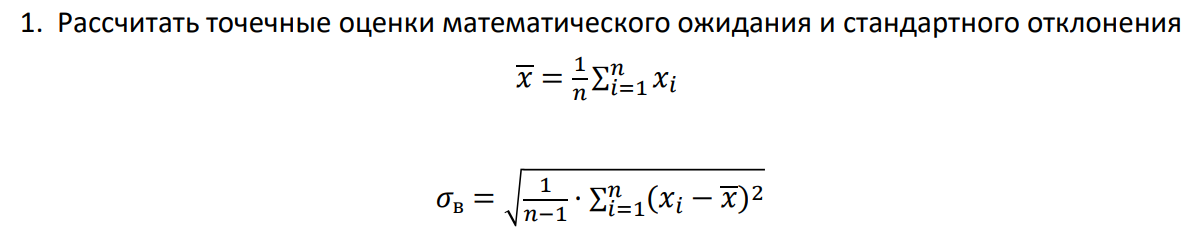

In [97]:
def calculate_basic_statistics(data):
    mean = np.mean(data["number"])
    std_dev = np.std(data["number"], ddof=1)  # Выборочное стандартное отклонение смещение = 1

    statistics = {
        'выборочное среднее': mean,
        'выборочное стандартное отклонение': std_dev,
    }

    for stat, value in statistics.items():
        print(f'{stat}: {value:.4f}')

    return mean, std_dev, len(data["number"])

### Функция для расчета доверительного интервала нормального распределения
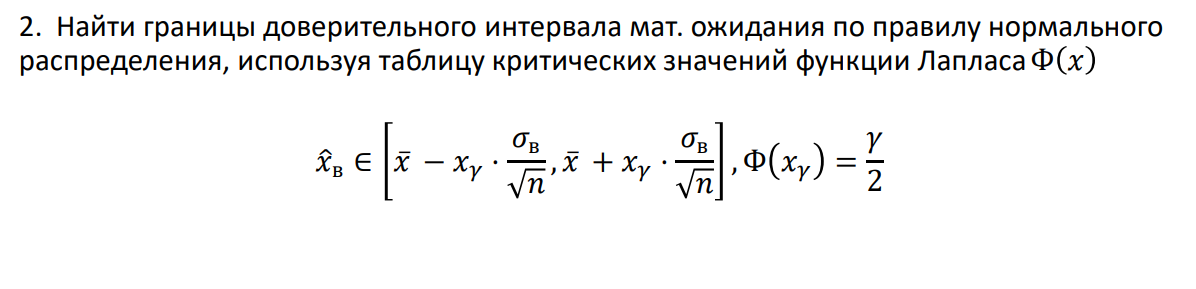

In [98]:
def calculate_normal_confidence_interval(mean, std_dev, n, confidence_level=0.95):
    x_gamma = stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error_norm = x_gamma * (std_dev / np.sqrt(n))
    lower_bound_norm = mean - margin_of_error_norm
    upper_bound_norm = mean + margin_of_error_norm
    return (lower_bound_norm, upper_bound_norm)

### Функция для расчета доверительного интервала T-распределения
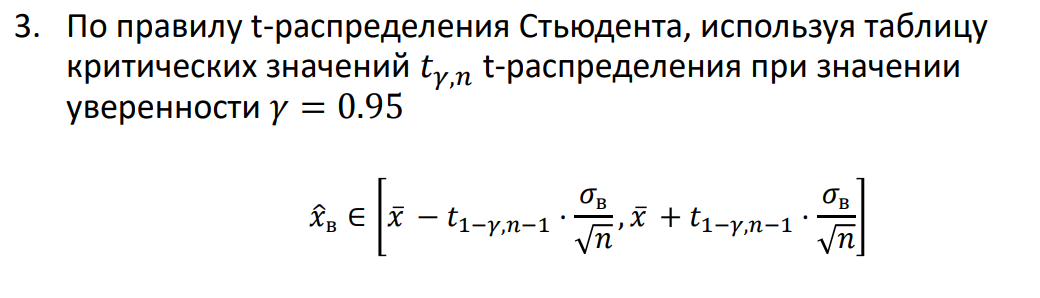

In [99]:
def calculate_t_confidence_interval(mean, std_dev, n, confidence_level=0.95):
    t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n - 1)
    margin_of_error_t = t_critical * (std_dev / np.sqrt(n))
    lower_bound_t = mean - margin_of_error_t
    upper_bound_t = mean + margin_of_error_t
    return (lower_bound_t, upper_bound_t)

### Функция для расчета доверительного интервала по распределению Хи-квадрат
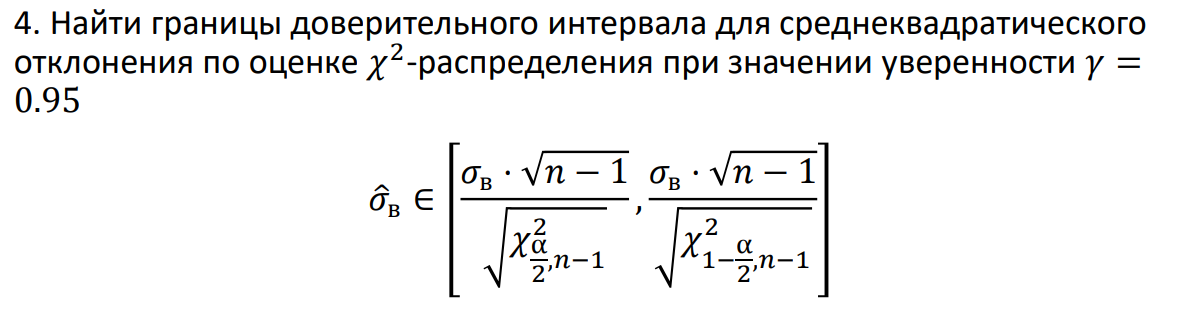

In [100]:
def calculate_chi_squared_confidence_interval(std_dev, n, confidence_level=0.95):
    alpha = 1 - confidence_level
    chi2_lower = chi2.ppf(alpha / 2, df=n - 1)
    chi2_upper = chi2.ppf(1 - alpha / 2, df=n - 1)
    lower_bound_chi = std_dev * np.sqrt((n - 1) / chi2_upper)
    upper_bound_chi = std_dev * np.sqrt((n - 1) / chi2_lower)
    return (lower_bound_chi, upper_bound_chi)

## Загрузка данных и расчет статистик для каждого файла

In [106]:
data_files = [
    "/kaggle/input/math-statistics/practice_2/data_14/1.txt",
    "/kaggle/input/math-statistics/practice_2/data_14/2.txt",
    "/kaggle/input/math-statistics/practice_2/data_14/3.txt",
    "/kaggle/input/math-statistics/practice_2/data_14/4.txt"
]

for file in data_files:
    data = pd.read_csv(file, header=None, names=["number"])
    print(f"статистики для {file}:")
    print("первые 5 строк данных")
    print(data.head())
    
    # основные статистики
    mean, std_dev, n = calculate_basic_statistics(data)
    
    # доверительные интервалы
    inter_norm = calculate_normal_confidence_interval(mean, std_dev, n)
    print(f"нормальное распределение: {inter_norm}")
    
    inter_t = calculate_t_confidence_interval(mean, std_dev, n)
    print(f"T-распределение: {inter_t}")
    
    inter_chi = calculate_chi_squared_confidence_interval(std_dev, n)
    print(f"Xi-распределение: {inter_chi}")
    
    print("\n")

статистики для /kaggle/input/math-statistics/practice_2/data_14/1.txt:
первые 5 строк данных
      number
0  43.031146
1  35.996932
2  40.713954
3  39.115721
4  43.338425
выборочное среднее: 40.9099
выборочное стандартное отклонение: 2.6077
нормальное распределение: (40.39882295135442, 41.42100773658879)
T-распределение: (40.39249859692044, 41.42733209102277)
Xi-распределение: (2.2895452308887236, 3.0292566106108345)


статистики для /kaggle/input/math-statistics/practice_2/data_14/2.txt:
первые 5 строк данных
      number
0  69.456629
1  66.627136
2  70.469749
3  57.861833
4  66.030229
выборочное среднее: 64.7941
выборочное стандартное отклонение: 3.9233
нормальное распределение: (62.36251816368766, 67.22576816671811)
T-распределение: (61.98760286245154, 67.60068346795423)
Xi-распределение: (2.6985651682851532, 7.162366801052363)


статистики для /kaggle/input/math-statistics/practice_2/data_14/3.txt:
первые 5 строк данных
      number
0  74.678358
1  73.709741
2  74.129748
3  71.8073